# Test Deep RL Algorithm Implementations with BBRL

In [11]:
import torch
from omegaconf import OmegaConf

import bbrl_utils
from bbrl_utils.notebook import setup_tensorboard
from bbrl.stats import WelchTTest

from pmind.algorithms import DQN, DDPG, TD3
from pmind.losses import dqn_compute_critic_loss, ddqn_compute_critic_loss
from pmind.training import run_dqn, run_ddpg, run_td3
from pmind.config.loader import load_config

bbrl_utils.setup()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load all configurations:

In [6]:
cfg = load_config("bbrl_example")
cfg_dqn = OmegaConf.create(cfg.dqn)
cfg_dqqn = OmegaConf.create(cfg.ddqn)
cfg_ddpg = OmegaConf.create(cfg.ddpg)
cfg_td3 = OmegaConf.create(cfg.td3)

In [7]:
setup_tensorboard("./outputs/tblogs")

Launch tensorboard from the shell: 
/Users/vlad/Documents/University/Master-MIND/projet-mind/.venv/bin/tensorboard --logdir '/Users/vlad/Documents/University/Master-MIND/projet-mind/experiments/notebooks/outputs'


## Discrete action space

### DQN:

In [8]:
dqn = DQN(cfg_dqn)
run_dqn(dqn, dqn_compute_critic_loss)
dqn.visualize_best()

  0%|          | 0/3000 [00:00<?, ?it/s]

KeyboardInterrupt: 

### DDQN:

In [ ]:
ddqn = DQN(cfg_dqqn)
run_dqn(ddqn, ddqn_compute_critic_loss)
ddqn.visualize_best()

  0%|          | 0/3000 [00:00<?, ?it/s]

KeyboardInterrupt: 

/Users/vlad/Documents/University/Master-MIND/projet-mind/.venv/lib/python3.10/site-packages/bbrl/stats.py:29: RuntimeWarning: All-NaN slice encountered
  central = np.nanmedian(sample, axis=1)
/Users/vlad/Documents/University/Master-MIND/projet-mind/.venv/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


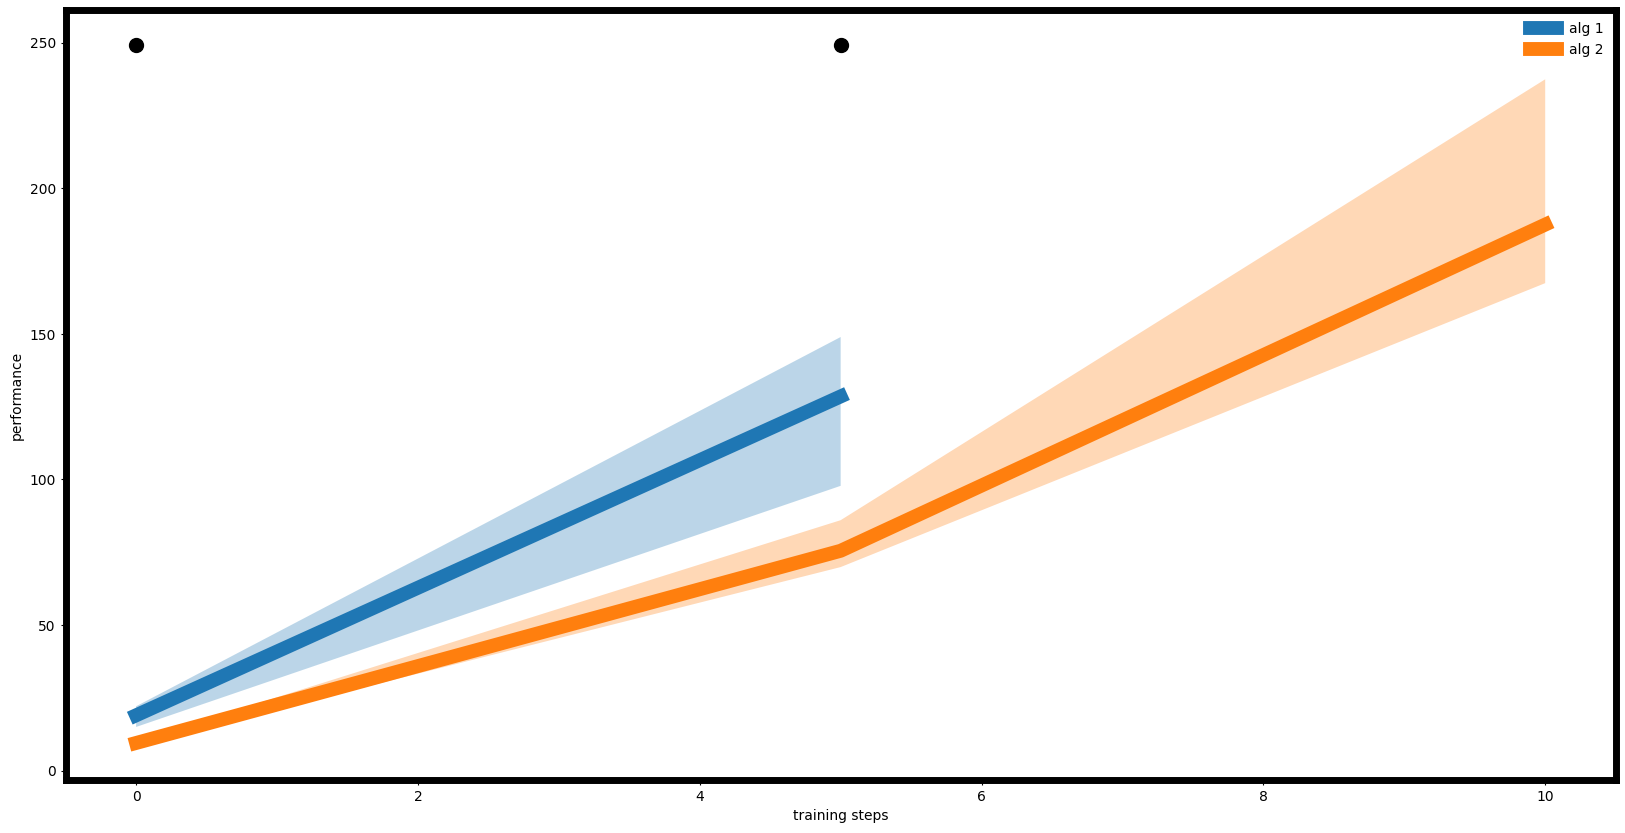

In [ ]:
WelchTTest().plot(
    torch.stack(dqn.eval_rewards), torch.stack(ddqn.eval_rewards), save=False
)

# Continuous action space

### DDPG:

In [5]:
ddpg = DDPG(cfg_ddpg)
run_ddpg(ddpg)
ddpg.visualize_best()

NameNotFound: Environment `CartPoleContinuous` doesn't exist. Did you mean: `MountainCarContinuous`?

### TD3:

In [9]:
cfg_td3.gym_env.env_name

'CartPoleContinuous-v1'

In [ ]:
cfg_td3.gym_env.env_name = 'CartPoleContinuous-v2'

In [21]:
td3 = TD3(cfg_td3)
run_td3(td3)
td3.visualize_best()

NameNotFound: Environment `CartPoleContinuous` doesn't exist. Did you mean: `MountainCarContinuous`?

In [ ]:
WelchTTest().plot(
    torch.stack(ddpg.eval_rewards),
    torch.stack(td3.eval_rewards),
    legends="ddpg/td3",
    save=False,
)